# Kinetic and Potential Energy

$Kinetic Energy=\frac{1}{2} m_{s}\left\|\vec{v}_{s}\right\|^{2}$  
  
$Potential Energy= -G \frac{m_{E} m_{S}}{\left\|\vec{x}_{S}\right\|}$  
  
$\frac{1}{2} m_{s}\left\|\vec{v}_{s}\right\|^{2}-G \frac{m_{E} m_{S}}{\left\|\vec{x}_{S}\right\|}=constant$  

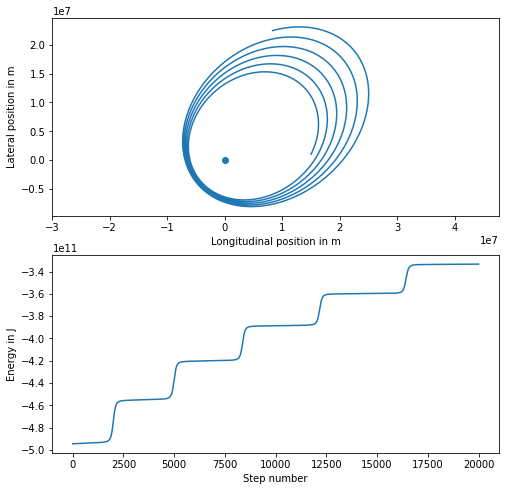

In [2]:
# QUIZ
#
# Fill in the total_energy function 
# below to compute the total energy 
# at each time step and store it in 
# the array energy.

from udacityplots import *
import numpy
import numpy as np

h = 5.0 # s
earth_mass = 5.97e24 # kg
spacecraft_mass = 30000. # kg
gravitational_constant = 6.67e-11 # N m2 / kg2

def acceleration(spaceship_position):
    vector_to_earth = - spaceship_position # earth located at origin
    return gravitational_constant * earth_mass / numpy.linalg.norm(vector_to_earth)**3 * vector_to_earth

def total_energy():
    num_steps = 20000
    x = numpy.zeros([num_steps + 1, 2]) # m
    v = numpy.zeros([num_steps + 1, 2]) # m / s
    energy = numpy.zeros(num_steps + 1) # J = kg m2 / s2

    x[0, 0] = 15e6
    x[0, 1] = 1e6
    v[0, 0] = 2e3
    v[0, 1] = 4e3
    energy[0] = 0.5 * spacecraft_mass * np.linalg.norm(v[0])**2 - gravitational_constant * (earth_mass * spacecraft_mass) / np.linalg.norm(x[0])
    for step in range(num_steps):
        x[step + 1] = x[step] + h * v[step] 
        v[step + 1] = v[step] + h * acceleration(x[step])
        energy[step+1] = 0.5 * spacecraft_mass * np.linalg.norm(v[step])**2 - gravitational_constant * (earth_mass * spacecraft_mass) / np.linalg.norm(x[step])
        

    ###Your code here.

    return x, energy

x, energy = total_energy()

@show_plot(8, 8)
def plot_me():
    axes_positions = matplotlib.pyplot.subplot(211)
    matplotlib.pyplot.plot(x[:, 0], x[:, 1])
    matplotlib.pyplot.scatter(0, 0)
    matplotlib.pyplot.axis('equal')
    axes_positions.set_xlabel('Longitudinal position in m')
    axes_positions.set_ylabel('Lateral position in m')
    axes_energy = matplotlib.pyplot.subplot(212)
    matplotlib.pyplot.plot(energy)
    axes_energy.set_xlabel('Step number')
    axes_energy.set_ylabel('Energy in J') # 1 Joule = 1 N m = 1 kg m2 / s2
    
plot_me()



